# Problema 
## DESAFIO 1

<pre>Implementação e simulação computacional de um SAD.
Uma empresa de artigos de couro fabrica dois tipos de produtos: malas e mochilas. </pre>

<pre>As malas são vendidas com um lucro de R$ 50,00 por unidade e o lucro unitário por mochila é igual a R$ 40,00.
A quantidade de horas necessárias para confeccionar cada produto, assim como o número total de horas disponíveis em cada departamento, são apresentados na tabela.</pre>

<pre>A modelagem matemática do SAD também está indicada, onde 
    x1 = quantidade de malas e 
    x2 = quantidade de mochilas.
Sabe-se que, atualmente, a empresa produz diariamente 120 unidades de malas e 30 unidades de mochilas.</pre>

### RESPONDA:

    1 - Indique o planejamento ótimo obtido com a utilização do SAD. Utilizar o software LINDO (ou similar) para implementar e executar computacionalmente o modelo de otimização do SAD.
 
    2 – Indique o aumento (percentual) de lucro da empresa caso adote a solução do SAD frente aquela praticada atualmente pela empresa.
 
    3 – Apresente uma proposta de cenário de atuação da empresa com o acréscimo de um novo produto ao mix de produção. Devem ser indicados os dados, a nova modelagem, a nova implementação computacional e a nova solução proposta pelo SAD.

IPython console for SymPy 1.8 (Python 3.8.11-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.8/



C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBa

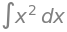

In [1]:
import sympy#para lidar com matematica simbólica. #recomendo o uso da fonte JuliaMono
sympy.init_session()
#teste do pprint
Integral(x**2)

In [18]:
import numpy as np
import scipy as sp
import matplotlib

matplotlib.set_loglevel("CRITICAL") #Para suprimir os avisos irritantes de deprecation do matplotlib.

import matplotlib.pyplot as plt


import scipy.optimize as opt
import scipy.linalg as linalg

#c = get_config() #para preprocessar algumas markdowns. Puramente estetico.
#c.Exporter.preprocessors = ['pre_pymarkdown.PyMarkdownPreprocessor']

In [19]:
#criando os simbolos e outras variáveis
x1, x2 = symbols("x_1 x_2")

Lucro = np.array([50,40])@(x1, x2)

restricoes = [
    2*x1 + 0*x2 <= 300,
    3*x2 <= 540,
    2*x1 + 2*x2 <= 440,
    1.2*x1 + 1.5*x2 <= 300,
    x1 >= 0,
    x2 >= 0,
]

restricoes

C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBa

Temos o problema devidamente apresentado, bastando apenas resolve-lo
usaremos a função scipy.optimize.linprog()
Infelizmente, Essa função nao recebe parametros da forma que os escrevemos, mas sim como matrizes, como podemos  ver em sua documentação:

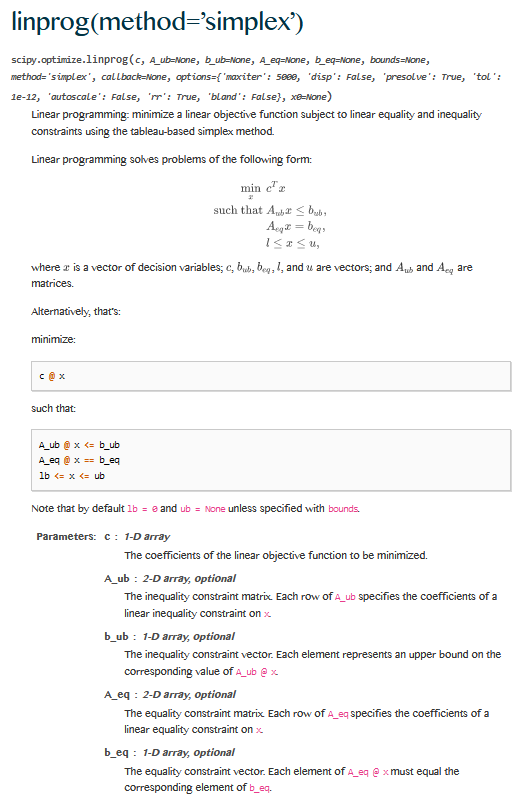


<h1><h1\>

In [20]:
x_vec = Matrix([x1, x2])
#primeiro retiramos os coeficientes do lucro
lucro_coeffs = np.array([Lucro.coeff(xi) for xi in x_vec], dtype=np.float64)
lucro_coeffs

array([50., 40.])

Note, no entanto, que queremos maximizar nosso lucro, mas a documentacao explicita que o metodo *minimiza*. Para isso, simplesmente tomamos


In [21]:
c = -lucro_coeffs #tirar a inversa tambem funcionaria
c

array([-50., -40.])

In [22]:
#repetimos um rocesso semelhante para as restrições
A_ub = np.array([[restricao.lhs.coeff(xi) for xi in [*x_vec]] for restricao in restricoes], dtype=float)
display(A_ub)
b_ub = np.array([[restricao.rhs] for restricao in restricoes], dtype=float)
display(b_ub)

array([[2. , 0. ],
       [0. , 3. ],
       [2. , 2. ],
       [1.2, 1.5],
       [1. , 0. ],
       [0. , 1. ]])

array([[300.],
       [540.],
       [440.],
       [300.],
       [  0.],
       [  0.]])

Mas a documentacao explicita que, de fato `A_ub` e b_ub so fazem sentido como limites superiores, entao, nao faz sentido usar as duas ultimas restricoes neles. De fato, elas entram nos vetores ```l``` descritos acima

In [23]:
l = b_ub[-2:]
old_A_ub = A_ub
old_b_ub = b_ub
A_ub = old_A_ub[:-2,...]
b_ub = old_b_ub[:-2,...]
display(l, A_ub, b_ub)

array([[0.],
       [0.]])

array([[2. , 0. ],
       [0. , 3. ],
       [2. , 2. ],
       [1.2, 1.5]])

array([[300.],
       [540.],
       [440.],
       [300.]])

Parece que temos tudo para executar a função.
Tentemos faze-lo:

In [24]:
import scipy
import scipy.optimize

res = scipy.optimize.linprog(  
        c=c, 
        A_ub=A_ub,
        b_ub=b_ub,
        method="simplex")

display(res)

     con: array([], dtype=float64)
     fun: -10300.0
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([  0., 330.,   0.,  15.])
  status: 0
 success: True
       x: array([150.,  70.])

Aparentemente, nossa otimização funcionou corretamente e finalizou em apenas 4 iteracoes, como pode-se ver pelo vlor `nit = 4`. O resultado final dado é o oposto da nossa função, `res.fun = -Lucro_max`, portanto,

In [25]:
Lucro_max = -res.fun
display(Lucro_max)
x_max = res.x
display(x_max)
#testando

array([150.,  70.])

Temos o suficiente para responder a primeira pergunta:

    1 - Indique o planejamento ótimo obtido com a utilização do SAD. Utilizar o software LINDO (ou similar) para implementar e executar computacionalmente o modelo de otimização do SAD.`

O planejamento otimo é obtido quando 
    $x_1 = 150$ e $x_2 = 70$
e dá um lucro
    $L_{ucro} = 10300.00$

Indo para a segunda pergunta, temos:
    
    2 – Indique o aumento (percentual) de lucro da empresa caso adote a solução do SAD frente aquela praticada atualmente pela empresa.

Definindo o aumento percentual como 

$I_{ncrease}^{\%} = \frac{ L_{ucro_{max}} - L_{ucro_{atual}}}{L_{ucro_{atual}}}\times{100\%}$

temos que 

In [26]:
Lucro_atual =  lucro_coeffs.T @ (x_atual := np.array([ 120., 30.])) 
display(Lucro_atual)
I_ncrease = ( (Lucro_max-Lucro_atual)/Lucro_atual )* 100
display(str(I_ncrease) + "%")

'43.05555555555556%'

Ou seja, ao trocar as produções de malas e mochilas de 

In [27]:
import pandas as pd
prod_atual = pd.DataFrame(
        columns=["Malas ($x_1$)", "Mochilas ($x_2$)"],
        index=["atual", "máximo"],
        data=[x_atual, x_max])
display(prod_atual)

,Malas ($x_1$),Mochilas ($x_2$)
atual,120.0,30.0
máximo,150.0,70.0


        
nosso aumento de lucro é de,

$I_{ncrease}^{\%} \approx 43\%$

Focamos agora na terceira pergunta

`3 – Apresente uma proposta de cenário de atuação da empresa com o acréscimo de um novo produto ao mix de produção. Devem ser indicados os dados, a nova modelagem, a nova implementação computacional e a nova solução proposta pelo SAD.`

    

Afim de maximizar os lucros, podemos otimizar nossa oferta aproveitando o resto dos processos que sao subutilizados. Isso permite que adicionemos produtos novos sem comprometer a oferta dos produtos existentes. Observando a variável `res.slack`,

In [28]:
display(res.slack)

array([  0., 330.,   0.,  15.])

e remetendo à tabela apresentada no problema,
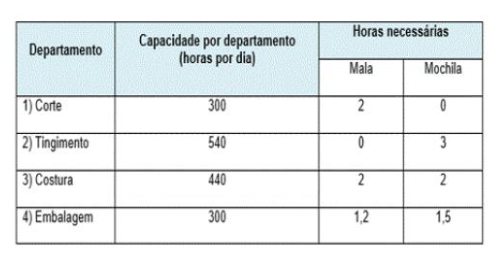


vemos que o departamento de tingimento está fortemente subutilizado, com 330 horas disponíveis. e o de embalagens tambem, com 15 horas disponiveis para uso.

Uma idéia seria de possibilitar o tingimento com estampas personalizado de mochilas e, dado o interesse dos produtos, permitir o envio dos mesmos com empacotameto para presente (Por exemplo, uma mae poderia comprar para seu filho(a) uma mochila de seu desenho animado favorito como presente de aniversário).

Para isso, teriamos que adicionar uma nova variavel, $x_3$, que representa o numero de mochilas personalizadas. Elas terão as mesmas restrições das mochilas padrao, com excessão do tingimento personalizado, que consumira, por exemplo, 7 horas de trabalho do departamento de tingimento e 0.1h adicional para a embalagem personalizada e terá um lucro adicional de, por exemplo, R$20.00

In [29]:
horas_ting_ting = 7
horas_emb_ting= 0.1
lucro_extra_moch_ting = 20.0


Com essas novas variaveis, reescrevemos o codigo simplesmente adicionando suas novas informações às matrizes existentes.

In [34]:
from builtins import *
from dataclasses import dataclass
import copy

info_moch_ting = dataclass() #Um pequeno objeto o qual servira para c
info_moch_ting.c = -c[1] + lucro_extra_moch_ting
info_moch_ting.A_ub = copy.deepcopy(A_ub[:,-1]) 

info_moch_ting.A_ub[1], info_moch_ting.A_ub[3] =  info_moch_ting.A_ub[1] + horas_ting_ting, \
                                                  info_moch_ting.A_ub[3] + horas_emb_ting

In [35]:
display(vars(info_moch_ting))

{'c': 60.0, 'A_ub': array([ 0. , 10. ,  2. ,  1.6])}

agora, reescrevemos e resolvemos o problema:

In [38]:
new_A_ub = np.append(A_ub, info_moch_ting.A_ub[:,np.newaxis], 1 )

new_c =(np.append(c[:, np.newaxis], -info_moch_ting.c,)) #muita dessa manipulacao é puramente logistica, e visa apenas ajustar as dimensões corretamente

display(new_A_ub, new_c, b_ub)

array([[ 2. ,  0. ,  0. ],
       [ 0. ,  3. , 10. ],
       [ 2. ,  2. ,  2. ],
       [ 1.2,  1.5,  1.6]])

array([-50., -40., -60.])

array([[300.],
       [540.],
       [440.],
       [300.]])

In [37]:
scipy.optimize.linprog(
    A_ub=new_A_ub,
    c=new_c,
    b_ub=b_ub,
    method = "simplex"
    )

     con: array([], dtype=float64)
     fun: -11242.857142857143
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([ 0.        ,  0.        ,  0.        , 10.28571429])
  status: 0
 success: True
       x: array([150.        ,  22.85714286,  47.14285714])

Pelos novos resultados, teriamos que produzir 150 malas, como anteriormente, mas agora, temos que produzir apenas aproximadamente, 23 mochilas comuns e 47 mochilas personalizadas, totalizando a mesma somatoria de 70 mochilas. Além disso, nosso departamento de tintura torna-se totalmente ocupado, restando apenas o departamento de embalagem com horas extras

Adicionalmente, nosso lucro aumenta consideravelmente, de 10300 para 11242.85